In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout  
from keras.initializers import glorot_normal

In [58]:
import pandas as pd
file_path = r'C:\Users\92349\Desktop\Prodigy internship\archive\twitter_training.csv'

df = pd.read_csv(file_path, header=None)



In [59]:
df.columns = ['ID', 'Brand', 'Sentiment', 'Text']

In [60]:
df.head()

,ID,Brand,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


# Text Cleaning

In [61]:
import re

def clean_text(text):
    # Check if text is a string
    if not isinstance(text, str):
        return text
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # Emoticons
        "\U0001F300-\U0001F5FF"  # Symbols & pictographs
        "\U0001F680-\U0001F6FF"  # Transport & map symbols
        "\U0001F700-\U0001F77F"  # Alchemical symbols
        "\U0001F780-\U0001F7FF"  # Geometric shapes
        "\U0001F800-\U0001F8FF"  # Miscellaneous Symbols and Arrows
        "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        "\U0001FA00-\U0001FA6F"  # Extended-A
        "\U0001FA70-\U0001FAFF"  # Extended-B
        "\U00002702-\U000027B0"  # Dingbats
        "\U000024C2-\U0001F251"
        "]+"
    )
    text = emoji_pattern.sub(r'', text)
    # Remove special characters and emojis
    text = re.sub(r'[^\w\s]', '', text)
    return text



In [62]:
df['Cleaned_Text'] = df['Text'].apply(clean_text)

In [63]:
df

,ID,Brand,Sentiment,Text,Cleaned_Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...
...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,Just realized between the windows partition of...


In [64]:

df.drop(['ID', 'Brand'], axis=1, inplace=True)


In [65]:
df.head()

,Sentiment,Text,Cleaned_Text
0,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...


# Sentiment Analysis

In [66]:
df= df.drop_duplicates()


In [67]:

df['Sentiment'] = df['Sentiment'].replace('Irrelevant', 'Neutral')

df['Sentiment'].value_counts()


C:\Users\92349\AppData\Local\Temp\ipykernel_17204\637355751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['Sentiment'].replace('Irrelevant', 'Neutral')


Neutral     29396
Negative    21238
Positive    19139
Name: Sentiment, dtype: int64

In [68]:
df['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [69]:
label_encoder = LabelEncoder()

In [70]:
df['Sentiment_Label'] = label_encoder.fit_transform(df['Sentiment'])

C:\Users\92349\AppData\Local\Temp\ipykernel_17204\3880685213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment_Label'] = label_encoder.fit_transform(df['Sentiment'])


In [71]:
df = df.dropna(subset=['Cleaned_Text'])

In [72]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Cleaned_Text'])
total_words = len(tokenizer.word_index) + 1

In [73]:
sequences = tokenizer.texts_to_sequences(df['Cleaned_Text'])
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post')


In [74]:
#model = Sequential()
#model.add(Embedding(input_dim=total_words, output_dim=100, input_length=100))
#model.add(LSTM(100))
#model.add(Dense(4, activation='softmax'))  # 4 output classes: Positive, Neutral, Negative, Irrelevant


In [75]:
from keras.initializers import glorot_normal

model = Sequential()

# Apply Xavier/Glorot initialization to the Embedding layer
model.add(Embedding(40758, 200, input_length=100, embeddings_initializer=glorot_normal()))

model.add(LSTM(100, return_sequences=True,dropout=0.6 ))


model.add(LSTM(100, return_sequences=True,dropout=0.6 ))

model.add(LSTM(100, return_sequences=True,dropout=0.6 ))


model.add(LSTM(100))
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))

In [76]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [77]:

labels_one_hot = to_categorical(df['Sentiment_Label'], num_classes=4)

In [78]:
y= df['Sentiment']
le= LabelEncoder()
y= le.fit_transform(y)

y= to_categorical(y)

In [79]:
y.shape

(69769, 3)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)


In [81]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(55815, 100)
(13954, 100)
(55815, 3)
(13954, 3)


In [82]:
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


Epoch 1/5
1745/1745 [==============================] - 1136s 645ms/step - loss: 1.0835 - accuracy: 0.4193 - val_loss: 1.0782 - val_accuracy: 0.4278
Epoch 2/5
1745/1745 [==============================] - 962s 551ms/step - loss: 1.0824 - accuracy: 0.4196 - val_loss: 1.0786 - val_accuracy: 0.4278
Epoch 3/5
1745/1745 [==============================] - 893s 512ms/step - loss: 1.0824 - accuracy: 0.4195 - val_loss: 1.0786 - val_accuracy: 0.4278
Epoch 4/5
1745/1745 [==============================] - 846s 484ms/step - loss: 1.0822 - accuracy: 0.4196 - val_loss: 1.0780 - val_accuracy: 0.4278
Epoch 5/5
1745/1745 [==============================] - 797s 457ms/step - loss: 1.0820 - accuracy: 0.4197 - val_loss: 1.0784 - val_accuracy: 0.4278


In [46]:

predictions = model.predict(X_test)


463/463 [==============================] - 14s 29ms/step


In [47]:
from sklearn.metrics import classification_report, accuracy_score

# Convert predictions to class labels
predicted_labels = label_encoder.inverse_transform(predictions.argmax(axis=1))

# Convert one-hot encoded true labels to class labels
true_labels = label_encoder.inverse_transform(y_test.argmax(axis=1))

# Evaluate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy: {accuracy:.2f}')

# Generate a detailed classification report
print(classification_report(true_labels, predicted_labels))


Accuracy: 0.30


C:\Users\92349\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

  Irrelevant       0.00      0.00      0.00      2696
    Negative       0.30      1.00      0.46      4380
     Neutral       0.00      0.00      0.00      3605
    Positive       0.00      0.00      0.00      4119

    accuracy                           0.30     14800
   macro avg       0.07      0.25      0.11     14800
weighted avg       0.09      0.30      0.14     14800



C:\Users\92349\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\92349\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


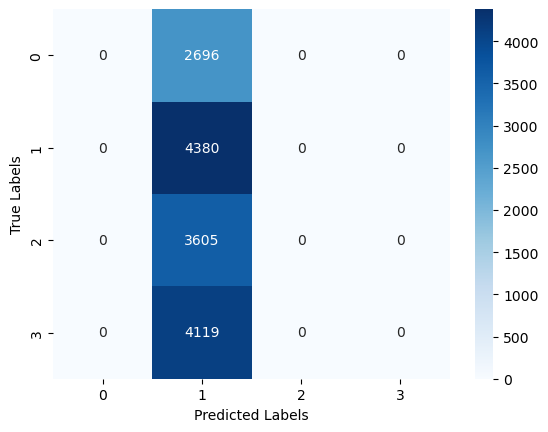

In [48]:
# For example, you can create a confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(true_labels, predicted_labels)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
